In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv('/content/drive/MyDrive/EPL_DS_Challenge/epl_matches_train.csv')
test = pd.read_csv('/content/drive/MyDrive/EPL_DS_Challenge/epl_matches_test.csv')
test.head()

,season,stage,date,match_id,home_team_id,away_team_id,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11
0,2015/2016,1,8/9/2015 0:00,48994,9825,8654,1,2,4,6,8,4,6,3,5,7,5,1,2,4,6,8,3,5,7,5,4,6,1,3,3,3,3,6,6,8,8,8,11,1,3,3,3,3,6,6,6,8,10,10,30859,26154.0,35606,46539,38521,159594,37436,75489.0,36378,196386,46469,169756,109897.0,35110,49543,155782,37169,575789,148302,25496,18506,192899
1,2015/2016,1,8/8/2015 0:00,54777,8678,10252,1,2,4,6,8,2,4,6,8,4,6,1,2,4,6,8,3,5,7,3,5,7,1,3,3,3,3,7,7,7,7,10,10,1,3,3,3,3,7,7,7,10,10,10,30974,35515.0,24625,156013,68237,155913,46810,23629.0,24381,185236,184321,69650,183500.0,24208,161414,473853,261313,179410,182223,23991,154280,23264
2,2015/2016,1,8/8/2015 0:00,31434,8455,10003,1,2,4,6,8,4,6,3,5,7,5,1,2,4,6,8,4,6,3,5,7,5,1,3,3,3,3,6,6,8,8,8,11,1,3,3,3,3,6,6,8,8,8,11,170323,31306.0,23783,30627,72541,115067,30613,94086.0,128864,107417,19243,30973,111800.0,155050,24948,102356,127130,144996,95955,157729,52563,26344
3,2015/2016,1,8/8/2015 0:00,56248,8668,9817,1,2,4,6,8,4,6,3,5,7,5,1,2,4,6,8,4,6,3,5,7,5,1,3,3,3,3,6,6,8,8,8,11,1,3,3,3,3,6,6,8,8,8,11,31465,77690.0,263653,23268,316688,23782,101192,26151.0,160713,215384,181276,30455,213809.0,41927,40548,35712,41365,30966,24915,37411,71724,72436
4,2015/2016,1,8/8/2015 0:00,44311,8197,8472,1,3,5,7,2,4,6,8,5,4,6,1,2,4,6,8,3,5,7,3,5,7,1,3,3,3,7,7,7,7,9,11,11,1,3,3,3,3,7,7,7,10,10,10,37770,67850.0,38899,23571,139671,103419,173317,214570.0,278343,20694,286119,103428,22964.0,26108,165526,180330,35443,25150,109058,24159,30348,42598


In [3]:
teams = pd.read_csv('/content/drive/MyDrive/EPL_DS_Challenge/epl_teams.csv')

In [4]:
train['match_result'] = 0
for i in range(len(train)):
  if train['home_team_goal'].iloc[i]>train['away_team_goal'].iloc[i]:
      train['match_result'].iloc[i] = 'won'
  elif train['home_team_goal'].iloc[i]<train['away_team_goal'].iloc[i]:
      train['match_result'].iloc[i] = 'lose'
  else:
      train['match_result'].iloc[i] = 'draw'

train.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,season,stage,date,match_id,home_team_id,away_team_id,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,...,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,on_target_shot_home_team,on_target_shot_away_team,off_target_shot_home_team,off_target_shot_away_team,foul_home_team,foul_away_team,yellow_card_home_team,yellow_card_away_team,red_card_home_team,red_card_away_team,crosses_home_team,crosses_away_team,corner_home_team,corner_away_team,possession_home_team,possession_away_team,home_team_goal,away_team_goal,match_result
0,2008/2009,1,2008-08-17 00:00:00,49337,10260,10261,1,2,4,6,8,2,4,6,8,4,6,1,2,4,6,8,2,4,6,8,5,5,1,3,3,3,3,7,7,7,7,10,10,1,...,30362.0,30620,30865,32569.0,24148,34944.0,30373.0,24154.0,24157.0,30829.0,24224,25518.0,24228.0,30929,29581.0,38807.0,40565.0,30360.0,33852.0,34574.0,37799.0,11,1,10,9,16,11,3,0,0,0,24,9,6,6,55.0,45.0,1,1,draw
1,2008/2009,1,2008-08-16 00:00:00,38136,9825,8659,1,2,4,6,8,2,4,6,8,4,6,1,2,4,6,8,5,7,9,1,3,5,1,3,3,3,3,7,7,7,7,10,10,1,...,26111.0,38835,30986,31291.0,31013,30935.0,39297.0,26181.0,30960.0,36410.0,36373,36832.0,23115.0,37280,24728.0,24664.0,31088.0,23257.0,24171.0,25922.0,27267.0,12,2,13,3,11,9,0,0,0,0,21,7,7,5,66.0,34.0,1,0,won
2,2008/2009,1,2008-08-16 00:00:00,43276,8472,8650,1,2,4,6,8,2,4,6,8,4,6,1,2,4,6,8,2,4,6,8,4,6,1,3,3,3,3,7,7,7,7,10,10,1,...,38836.0,24446,24408,36786.0,38802,24655.0,17866.0,30352.0,23927.0,24410.0,30660,37442.0,30617.0,24134,414792.0,37139.0,30618.0,40701.0,24800.0,24635.0,30853.0,4,11,3,5,13,12,0,2,0,0,15,19,1,8,46.0,54.0,0,1,lose
3,2008/2009,1,2008-08-16 00:00:00,40671,8654,8528,1,2,4,6,8,2,4,6,8,4,6,1,2,6,8,4,2,4,6,8,4,6,1,3,3,3,3,7,7,7,7,10,10,1,...,30966.0,23818,37277,30687.0,36394,37169.0,24223.0,24773.0,34543.0,23139.0,34421,34987.0,35472.0,111865,25005.0,35327.0,25150.0,97988.0,41877.0,127857.0,34466.0,5,7,7,15,14,13,2,1,0,0,15,27,6,10,52.0,48.0,2,1,won
4,2008/2009,1,2008-08-17 00:00:00,34633,10252,8456,1,2,4,6,8,2,4,6,8,4,6,1,2,4,6,8,1,3,5,7,9,5,1,3,3,3,3,7,7,7,7,10,10,1,...,30357.0,24658,43280,23282.0,38609,24780.0,23782.0,23354.0,23264.0,26165.0,31432,46403.0,24208.0,23939,33963.0,47413.0,40198.0,42119.0,NaN,33633.0,107216.0,5,9,4,5,11,13,0,1,0,0,16,16,7,8,52.0,48.0,4,2,won


In [5]:
group = train[['home_team_id', 'home_team_goal', 'away_team_goal']]
group = group.groupby('home_team_id')['home_team_goal', 'away_team_goal'].apply(lambda x: x.astype(int).sum()).reset_index()
group['probability'] = group['home_team_goal']/(group['home_team_goal'] + group['away_team_goal'])

group.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,home_team_id,home_team_goal,away_team_goal,probability
0,8191,39,51,0.433333
1,8197,28,22,0.560000
2,8344,20,35,0.363636
3,8455,301,99,0.752500
4,8456,318,104,0.753555


In [6]:
train = pd.merge(train, group, on='home_team_id')

In [7]:
score = pd.read_csv("/content/drive/MyDrive/EPL_DS_Challenge/score.csv")
score = score[['player_id', 'score']]
score.head()

,player_id,score
0,2802,0.716486
1,3520,0.668640
2,8922,0.576991
3,8985,0.620629
4,10491,0.614042


In [8]:
for j in range(len(train['home_player_1'])):
  id = train['home_player_1'].iloc[j]
  flag = 0
  for i in range(len(score)):
    if id== score['player_id'].iloc[i]:
      flag = 1
      train['home_player_1'].iloc[j] = score['score'].iloc[i]
  if flag==0:
    train['home_player_1'].iloc[j] = score['score'].mean()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [9]:
for k in range(2, 12):
  name = 'home_player_'+str(k)
  for j in range(len(train[name])):
    id = train[name].iloc[j]
    flag = 0
    for i in range(len(score)):
      if id== score['player_id'].iloc[i]:
        flag = 1
        train[name].iloc[j] = score['score'].iloc[i]
    if flag==0:
      train[name].iloc[j] = score['score'].mean()
      # train[name].iloc[j] = 0.5

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [10]:
for k in range(1, 12):
  name = 'away_player_'+str(k)
  for j in range(len(train[name])):
    id = train[name].iloc[j]
    flag = 0
    for i in range(len(score)):
      if id== score['player_id'].iloc[i]:
        flag = 1
        train[name].iloc[j] = score['score'].iloc[i]
    if flag==0:
      train[name].iloc[j] = score['score'].mean()
      # train[name].iloc[j] = 0.5

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [11]:
teams = pd.read_csv('/content/drive/MyDrive/EPL_DS_Challenge/epl_teams.csv')
teams.head()

,team_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,9825,2/22/2010 0:00,66,Balanced,NaN,Little,30,Short,Free Form,30,Safe,45,Normal,35,Normal,Free Form,30,Deep,40,Press,50,Normal,Cover
1,9825,2/22/2011 0:00,75,Fast,NaN,Little,40,Mixed,Free Form,40,Normal,45,Normal,65,Normal,Free Form,50,Medium,40,Press,45,Normal,Cover
2,9825,2/22/2012 0:00,25,Slow,NaN,Little,32,Short,Organised,41,Normal,34,Normal,30,Little,Free Form,57,Medium,57,Press,52,Normal,Cover
3,9825,9/20/2013 0:00,30,Slow,NaN,Little,29,Short,Organised,41,Normal,55,Normal,39,Normal,Free Form,64,Medium,54,Press,52,Normal,Cover
4,9825,9/19/2014 0:00,59,Balanced,51.0,Normal,26,Short,Organised,28,Safe,55,Normal,64,Normal,Free Form,51,Medium,44,Press,52,Normal,Cover


In [12]:
categorical_col =  ['buildUpPlaySpeedClass','buildUpPlayDribblingClass', 'buildUpPlayPassingClass', 'buildUpPlayPositioningClass',
       'chanceCreationPassingClass', 'chanceCreationCrossingClass', 'chanceCreationShootingClass',
       'chanceCreationPositioningClass', 'defencePressureClass', 'defenceAggressionClass',
       'defenceTeamWidthClass', 'defenceDefenderLineClass' ]

for k in categorical_col:
       print(teams[k].value_counts())

Balanced    161
Fast         39
Slow          4
Name: buildUpPlaySpeedClass, dtype: int64
Little    155
Normal     49
Name: buildUpPlayDribblingClass, dtype: int64
Mixed    151
Long      42
Short     11
Name: buildUpPlayPassingClass, dtype: int64
Organised    198
Free Form      6
Name: buildUpPlayPositioningClass, dtype: int64
Normal    154
Risky      43
Safe        7
Name: chanceCreationPassingClass, dtype: int64
Normal    144
Lots       56
Little      4
Name: chanceCreationCrossingClass, dtype: int64
Normal    177
Lots       20
Little      7
Name: chanceCreationShootingClass, dtype: int64
Organised    179
Free Form     25
Name: chanceCreationPositioningClass, dtype: int64
Medium    170
Deep       21
High       13
Name: defencePressureClass, dtype: int64
Press      174
Double      24
Contain      6
Name: defenceAggressionClass, dtype: int64
Normal    184
Wide       16
Narrow      4
Name: defenceTeamWidthClass, dtype: int64
Cover    204
Name: defenceDefenderLineClass, dtype: int64


In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
label_encoder = LabelEncoder()
for k in categorical_col:
  teams[k] = label_encoder.fit_transform(teams[k])

teams.drop('defenceDefenderLineClass', axis=1, inplace = True)
teams['buildUpPlayDribbling'] = teams['buildUpPlayDribbling'].fillna(teams['buildUpPlayDribbling'].mean())

In [15]:
columns = teams.columns[2:]
columns = list(columns)
columns

['buildUpPlaySpeed',
 'buildUpPlaySpeedClass',
 'buildUpPlayDribbling',
 'buildUpPlayDribblingClass',
 'buildUpPlayPassing',
 'buildUpPlayPassingClass',
 'buildUpPlayPositioningClass',
 'chanceCreationPassing',
 'chanceCreationPassingClass',
 'chanceCreationCrossing',
 'chanceCreationCrossingClass',
 'chanceCreationShooting',
 'chanceCreationShootingClass',
 'chanceCreationPositioningClass',
 'defencePressure',
 'defencePressureClass',
 'defenceAggression',
 'defenceAggressionClass',
 'defenceTeamWidth',
 'defenceTeamWidthClass']

In [16]:
teams_data = teams.groupby('team_id')[columns].apply(lambda x: x.astype(float).mean()).reset_index()

teams_data.head()

,team_id,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass
0,8191,51.666667,0.166667,35.725490,0.000000,59.500000,0.666667,1.000000,62.500000,0.500000,61.833333,1.666667,54.333333,1.833333,1.000000,51.000000,1.666667,57.500000,1.833333,61.333333,1.166667
1,8197,53.666667,0.166667,37.892157,0.333333,54.333333,0.833333,1.000000,49.333333,0.166667,60.000000,1.833333,54.000000,1.833333,1.000000,55.500000,1.833333,55.833333,1.833333,55.833333,1.166667
2,8344,62.000000,0.166667,36.725490,0.166667,62.166667,0.500000,1.000000,58.166667,0.333333,57.333333,1.666667,53.500000,1.833333,1.000000,46.000000,1.166667,47.500000,1.833333,52.166667,1.166667
3,8455,61.666667,0.500000,40.558824,0.333333,45.000000,1.000000,0.666667,49.833333,0.000000,55.166667,1.833333,61.666667,1.500000,0.666667,40.833333,1.666667,50.333333,2.000000,44.833333,1.000000
4,8456,56.500000,0.333333,36.725490,0.333333,44.500000,1.333333,0.833333,45.666667,0.500000,50.333333,1.833333,52.833333,1.333333,0.333333,48.666667,2.000000,52.500000,2.000000,51.833333,1.000000


In [17]:
# group = group.groupby('home_team_id')['home_team_goal', 'away_team_goal'].apply(lambda x: x.astype(int).sum()).reset_index()
# group.head()

In [18]:
# categorical_agg = teams.groupby('team_id')['buildUpPlaySpeedClass', 'buildUpPlayDribblingClass', 'buildUpPlayPassingClass', 'buildUpPlayPositioningClass',
#                                            'chanceCreationPassingClass', 'chanceCreationCrossingClass', 'chanceCreationShootingClass',
#                                            'chanceCreationPositioningClass', 'defencePressureClass','defenceAggressionClass',
#                                            'defenceTeamWidthClass' ].apply(lambda x: x.mean()).reset_index()
# categorical_agg.head()

In [19]:
def normalize(data, columns):
  for column in columns:
    data[column] = data[column]/max(data[column])

  return data

In [20]:
teams_data_home = teams_data
teams_data_home = teams_data_home.rename(columns = {"team_id":"home_team_id"})
teams_data_home.head()

,home_team_id,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass
0,8191,51.666667,0.166667,35.725490,0.000000,59.500000,0.666667,1.000000,62.500000,0.500000,61.833333,1.666667,54.333333,1.833333,1.000000,51.000000,1.666667,57.500000,1.833333,61.333333,1.166667
1,8197,53.666667,0.166667,37.892157,0.333333,54.333333,0.833333,1.000000,49.333333,0.166667,60.000000,1.833333,54.000000,1.833333,1.000000,55.500000,1.833333,55.833333,1.833333,55.833333,1.166667
2,8344,62.000000,0.166667,36.725490,0.166667,62.166667,0.500000,1.000000,58.166667,0.333333,57.333333,1.666667,53.500000,1.833333,1.000000,46.000000,1.166667,47.500000,1.833333,52.166667,1.166667
3,8455,61.666667,0.500000,40.558824,0.333333,45.000000,1.000000,0.666667,49.833333,0.000000,55.166667,1.833333,61.666667,1.500000,0.666667,40.833333,1.666667,50.333333,2.000000,44.833333,1.000000
4,8456,56.500000,0.333333,36.725490,0.333333,44.500000,1.333333,0.833333,45.666667,0.500000,50.333333,1.833333,52.833333,1.333333,0.333333,48.666667,2.000000,52.500000,2.000000,51.833333,1.000000


In [21]:
teams_data_away = teams_data
teams_data_away = teams_data_away.rename(columns = {"team_id":"away_team_id"})
teams_data_away.head()

,away_team_id,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass
0,8191,51.666667,0.166667,35.725490,0.000000,59.500000,0.666667,1.000000,62.500000,0.500000,61.833333,1.666667,54.333333,1.833333,1.000000,51.000000,1.666667,57.500000,1.833333,61.333333,1.166667
1,8197,53.666667,0.166667,37.892157,0.333333,54.333333,0.833333,1.000000,49.333333,0.166667,60.000000,1.833333,54.000000,1.833333,1.000000,55.500000,1.833333,55.833333,1.833333,55.833333,1.166667
2,8344,62.000000,0.166667,36.725490,0.166667,62.166667,0.500000,1.000000,58.166667,0.333333,57.333333,1.666667,53.500000,1.833333,1.000000,46.000000,1.166667,47.500000,1.833333,52.166667,1.166667
3,8455,61.666667,0.500000,40.558824,0.333333,45.000000,1.000000,0.666667,49.833333,0.000000,55.166667,1.833333,61.666667,1.500000,0.666667,40.833333,1.666667,50.333333,2.000000,44.833333,1.000000
4,8456,56.500000,0.333333,36.725490,0.333333,44.500000,1.333333,0.833333,45.666667,0.500000,50.333333,1.833333,52.833333,1.333333,0.333333,48.666667,2.000000,52.500000,2.000000,51.833333,1.000000


In [22]:
columns = teams_data_home.columns[1:]
teams_data_home = normalize(teams_data_home, columns)
teams_data_home.head()

,home_team_id,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass
0,8191,0.786802,0.2,0.829690,0.0,0.888060,0.363636,1.000000,0.912409,0.500000,0.932161,0.833333,0.871658,0.916667,1.000000,0.918919,0.833333,0.966387,0.916667,1.000000,0.875
1,8197,0.817259,0.2,0.880009,1.0,0.810945,0.454545,1.000000,0.720195,0.166667,0.904523,0.916667,0.866310,0.916667,1.000000,1.000000,0.916667,0.938375,0.916667,0.910326,0.875
2,8344,0.944162,0.2,0.852914,0.5,0.927861,0.272727,1.000000,0.849148,0.333333,0.864322,0.833333,0.858289,0.916667,1.000000,0.828829,0.583333,0.798319,0.916667,0.850543,0.875
3,8455,0.939086,0.6,0.941940,1.0,0.671642,0.545455,0.666667,0.727494,0.000000,0.831658,0.916667,0.989305,0.750000,0.666667,0.735736,0.833333,0.845938,1.000000,0.730978,0.750
4,8456,0.860406,0.4,0.852914,1.0,0.664179,0.727273,0.833333,0.666667,0.500000,0.758794,0.916667,0.847594,0.666667,0.333333,0.876877,1.000000,0.882353,1.000000,0.845109,0.750


In [23]:
columns = teams_data_away.columns[1:]
teams_data_away = normalize(teams_data_away, columns)
teams_data_away.head()

,away_team_id,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass
0,8191,0.786802,0.2,0.829690,0.0,0.888060,0.363636,1.000000,0.912409,0.500000,0.932161,0.833333,0.871658,0.916667,1.000000,0.918919,0.833333,0.966387,0.916667,1.000000,0.875
1,8197,0.817259,0.2,0.880009,1.0,0.810945,0.454545,1.000000,0.720195,0.166667,0.904523,0.916667,0.866310,0.916667,1.000000,1.000000,0.916667,0.938375,0.916667,0.910326,0.875
2,8344,0.944162,0.2,0.852914,0.5,0.927861,0.272727,1.000000,0.849148,0.333333,0.864322,0.833333,0.858289,0.916667,1.000000,0.828829,0.583333,0.798319,0.916667,0.850543,0.875
3,8455,0.939086,0.6,0.941940,1.0,0.671642,0.545455,0.666667,0.727494,0.000000,0.831658,0.916667,0.989305,0.750000,0.666667,0.735736,0.833333,0.845938,1.000000,0.730978,0.750
4,8456,0.860406,0.4,0.852914,1.0,0.664179,0.727273,0.833333,0.666667,0.500000,0.758794,0.916667,0.847594,0.666667,0.333333,0.876877,1.000000,0.882353,1.000000,0.845109,0.750


In [24]:
train['match_result'].replace({'lose':0, 'draw':1, 'won':2}, inplace = True)


In [25]:
train = train[['match_id', 'home_team_id', 'away_team_id', 'home_player_1', 'home_player_2', 'home_player_3', 'home_player_4', 'home_player_5', 'home_player_6',
              'home_player_7', 'home_player_8', 'home_player_9', 'home_player_10', 'home_player_11','away_player_1', 'away_player_2', 'away_player_3',
              'away_player_4', 'away_player_5', 'away_player_6', 'away_player_7', 'away_player_8', 'away_player_9', 'away_player_10', 'away_player_11', 
              'match_result', 'probability']]


train.head()

,match_id,home_team_id,away_team_id,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,match_result,probability
0,49337,10260,10261,0.621874,0.600796,0.658599,0.689059,0.818174,0.815180,0.807849,0.744451,0.728749,0.633981,0.986483,0.621874,0.662871,0.550883,0.709323,0.650197,0.776265,0.602149,0.621874,0.670378,0.631608,0.630268,1,0.736967
1,42002,10260,8654,0.621874,0.598175,0.658599,0.689059,0.818174,0.963910,0.815180,0.735926,0.796470,0.917910,0.725727,0.807716,0.649718,0.600643,0.523476,0.621874,0.783192,0.615419,0.724458,0.618528,0.780830,0.614471,2,0.736967
2,36714,10260,8667,0.621874,0.621874,0.658599,0.689059,0.818174,0.963910,0.807849,0.735926,0.796470,0.725727,0.986483,0.621874,0.510872,0.497207,0.502659,0.509249,0.639514,0.621874,0.625409,0.617921,0.559804,NaN,2,0.736967
3,43475,10260,10194,0.621874,0.656821,0.689059,0.589268,0.818174,0.963910,0.807849,0.815180,0.712508,0.917910,0.725727,0.780441,0.621874,0.505517,0.559841,0.559554,0.588214,0.570171,0.621874,0.607469,0.534134,0.440495,2,0.736967
4,33156,10260,8472,0.621874,0.598175,0.658599,0.689059,0.818174,0.712508,0.815180,0.807849,0.963910,0.986483,0.725727,0.621874,0.618783,0.596099,0.504378,0.620561,0.696189,0.621874,0.555721,0.591753,0.666601,0.597926,2,0.736967


In [26]:
train = train.merge(teams_data_home, on = 'home_team_id')
train = train.merge(teams_data_away, on = 'away_team_id')

In [27]:
train['home_player_3'] = train['home_player_3'].fillna(train['home_player_3'].mean())
train['home_player_4'] = train['home_player_4'].fillna(train['home_player_4'].mean())
train['home_player_5'] = train['home_player_5'].fillna(train['home_player_5'].mean())
train['home_player_7'] = train['home_player_7'].fillna(train['home_player_7'].mean())
train['home_player_8'] = train['home_player_8'].fillna(train['home_player_8'].mean())
train['home_player_9'] = train['home_player_9'].fillna(train['home_player_9'].mean())
train['home_player_10'] = train['home_player_10'].fillna(train['home_player_10'].mean())
train['home_player_11'] = train['home_player_11'].fillna(train['home_player_11'].mean())

train['away_player_3'] = train['away_player_3'].fillna(train['away_player_3'].mean())
train['away_player_4'] = train['away_player_4'].fillna(train['away_player_4'].mean())
train['away_player_5'] = train['away_player_5'].fillna(train['away_player_5'].mean())
train['away_player_7'] = train['away_player_7'].fillna(train['away_player_7'].mean())
train['away_player_8'] = train['away_player_8'].fillna(train['away_player_8'].mean())
train['away_player_9'] = train['away_player_9'].fillna(train['away_player_9'].mean())
train['away_player_10'] = train['away_player_10'].fillna(train['away_player_10'].mean())
train['away_player_11'] = train['away_player_11'].fillna(train['away_player_11'].mean())

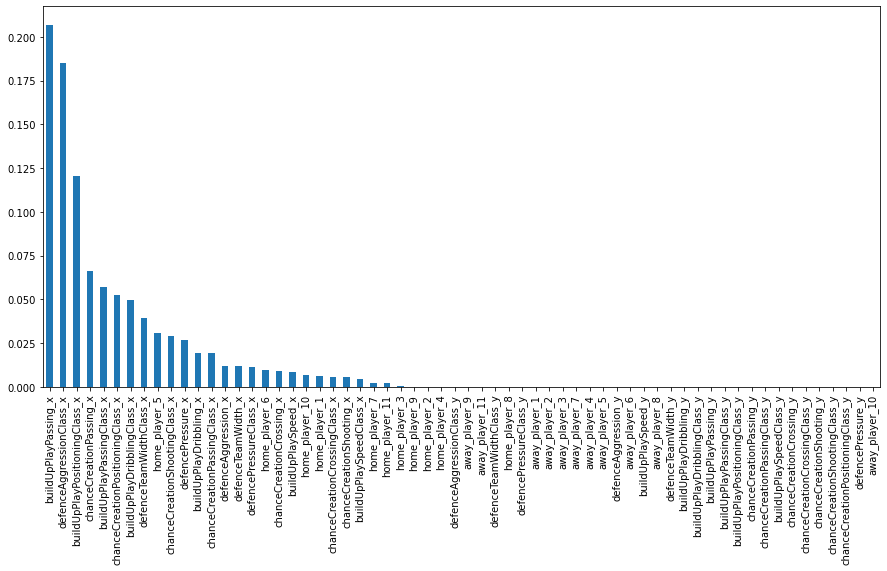

In [29]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
import seaborn as sns

X = train.drop(['match_id', 'home_team_id', 'away_team_id','match_result', 'probability'], axis = 1)
Y = train['probability']

etc = ExtraTreesRegressor()
etc.fit(X, Y)

################### checking feature importances ##########################

imp = etc.feature_importances_

plot_df = pd.Series(imp, index=X.columns).sort_values(ascending = False)
plt.figure(figsize=(15,7))
plot_df.plot(kind = 'bar')
plt.show()

In [30]:
train.head()

,match_id,home_team_id,away_team_id,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,match_result,probability,buildUpPlaySpeed_x,buildUpPlaySpeedClass_x,buildUpPlayDribbling_x,buildUpPlayDribblingClass_x,buildUpPlayPassing_x,buildUpPlayPassingClass_x,buildUpPlayPositioningClass_x,chanceCreationPassing_x,chanceCreationPassingClass_x,chanceCreationCrossing_x,chanceCreationCrossingClass_x,chanceCreationShooting_x,chanceCreationShootingClass_x,chanceCreationPositioningClass_x,defencePressure_x,defencePressureClass_x,defenceAggression_x,defenceAggressionClass_x,defenceTeamWidth_x,defenceTeamWidthClass_x,buildUpPlaySpeed_y,buildUpPlaySpeedClass_y,buildUpPlayDribbling_y,buildUpPlayDribblingClass_y,buildUpPlayPassing_y,buildUpPlayPassingClass_y,buildUpPlayPositioningClass_y,chanceCreationPassing_y,chanceCreationPassingClass_y,chanceCreationCrossing_y,chanceCreationCrossingClass_y,chanceCreationShooting_y,chanceCreationShootingClass_y,chanceCreationPositioningClass_y,defencePressure_y,defencePressureClass_y,defenceAggression_y,defenceAggressionClass_y,defenceTeamWidth_y,defenceTeamWidthClass_y
0,49337,10260,10261,0.621874,0.600796,0.658599,0.689059,0.818174,0.815180,0.807849,0.744451,0.728749,0.633981,0.986483,0.621874,0.662871,0.550883,0.709323,0.650197,0.776265,0.602149,0.621874,0.670378,0.631608,0.630268,1,0.736967,0.78934,0.2,0.876138,1.0,0.68408,0.545455,1.0,0.729927,0.0,0.952261,0.75,0.863636,0.916667,0.666667,0.810811,1.0,0.806723,1.0,0.894022,0.75,0.885787,0.2,0.88388,0.5,0.825871,0.454545,1.0,0.781022,0.0,0.864322,0.833333,0.799465,1.0,1.0,0.840841,1.0,0.812325,1.0,0.788043,0.75
1,49586,10260,10261,0.621874,0.656821,0.589268,0.689059,0.818174,0.695365,0.744451,0.815180,0.796470,0.725727,0.986483,0.621874,0.570130,0.709323,0.513793,0.760062,0.522281,0.621874,0.755215,0.670378,0.741593,0.539245,2,0.736967,0.78934,0.2,0.876138,1.0,0.68408,0.545455,1.0,0.729927,0.0,0.952261,0.75,0.863636,0.916667,0.666667,0.810811,1.0,0.806723,1.0,0.894022,0.75,0.885787,0.2,0.88388,0.5,0.825871,0.454545,1.0,0.781022,0.0,0.864322,0.833333,0.799465,1.0,1.0,0.840841,1.0,0.812325,1.0,0.788043,0.75
2,58063,10260,10261,0.621874,0.676139,0.658599,0.689059,0.818174,0.796470,0.728749,0.807849,0.770274,0.986483,0.645497,0.621874,0.621874,0.550883,0.709323,0.692650,0.482776,0.602149,0.788567,0.670378,0.713965,0.666116,1,0.736967,0.78934,0.2,0.876138,1.0,0.68408,0.545455,1.0,0.729927,0.0,0.952261,0.75,0.863636,0.916667,0.666667,0.810811,1.0,0.806723,1.0,0.894022,0.75,0.885787,0.2,0.88388,0.5,0.825871,0.454545,1.0,0.781022,0.0,0.864322,0.833333,0.799465,1.0,1.0,0.840841,1.0,0.812325,1.0,0.788043,0.75
3,59763,10260,10261,0.621874,0.561536,0.589268,0.658599,0.818174,0.695365,0.744451,0.807849,0.728749,0.645497,0.988830,0.621874,0.621874,0.709323,0.513793,0.707728,0.671275,0.570130,0.453706,0.675156,0.666116,0.600278,2,0.736967,0.78934,0.2,0.876138,1.0,0.68408,0.545455,1.0,0.729927,0.0,0.952261,0.75,0.863636,0.916667,0.666667,0.810811,1.0,0.806723,1.0,0.894022,0.75,0.885787,0.2,0.88388,0.5,0.825871,0.454545,1.0,0.781022,0.0,0.864322,0.833333,0.799465,1.0,1.0,0.840841,1.0,0.812325,1.0,0.788043,0.75
4,49022,10260,10261,0.621874,0.598175,0.589268,0.689059,0.818174,0.678339,0.603902,0.487534,0.988830,0.796470,0.645497,0.621874,0.770488,0.709323,0.513793,0.707728,0.671275,0.753545,0.788567,0.750915,0.663902,0.611909,0,0.736967,0.78934,0.2,0.876138,1.0,0.68408,0.545455,1.0,0.729927,0.0,0.952261,0.75,0.863636,0.916667,0.666667,0.810811,1.0,0.806723,1.0,0.894022,0.75,0.885787,0.2,0.88388,0.5,0.825871,0.454545,1.0,0.781022,0.0,0.864322,0.833333,0.799465,1.0,1.0,0.840841,1.0,0.812325,1.0,0.788043,0.75


In [31]:
train.drop(['away_player_1','away_player_2','away_player_3','away_player_4','away_player_5','away_player_6','away_player_7',
            'away_player_8','away_player_9','away_player_10','away_player_11','defenceTeamWidthClass_y', 'defenceTeamWidth_y', 'defenceAggressionClass_y',
            'defenceAggression_y', 'defencePressureClass_y', 'defencePressure_y', 'chanceCreationPositioningClass_y', 'chanceCreationShootingClass_y',
            'chanceCreationShooting_y', 'chanceCreationCrossingClass_y', 'chanceCreationCrossing_y', 'chanceCreationPassingClass_y', 
            'chanceCreationPassing_y', 'buildUpPlayPositioningClass_y', 'buildUpPlayPassingClass_y', 'buildUpPlayPassing_y', 'buildUpPlayDribblingClass_y',
            'buildUpPlayDribbling_y', 'buildUpPlaySpeedClass_y', 'buildUpPlaySpeed_y'], axis=1, inplace=True)

In [32]:
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X = train.drop(['match_id', 'home_team_id', 'away_team_id','match_result', 'probability'], axis = 1)
Y = train['probability']

train_x, test_x, train_y ,test_y = train_test_split(X, Y, test_size = 0.25)

In [35]:
R2_Score = []

model1 = AdaBoostRegressor()
model1.fit(train_x, train_y)

pred1 = model1.predict(test_x)

R2_Score.append(r2_score(test_y, pred1))



model2 = XGBRegressor()
model2.fit(train_x, train_y)

pred2 = model2.predict(test_x)

R2_Score.append(r2_score(test_y, pred2))


result = pd.DataFrame({'models':['AdaBoost', 'XGB'], 'R2 score':R2_Score})

[15:55:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [36]:
result

,models,R2 score
0,AdaBoost,0.980192
1,XGB,0.999955


In [37]:
result['R2 score'].mean()

0.9900735196863314

In [38]:
pred = (pred1+pred2)/2


In [39]:
for j in range(len(test['home_player_1'])):
  id = test['home_player_1'].iloc[j]
  flag = 0
  for i in range(len(score)):
    if id== score['player_id'].iloc[i]:
      flag = 1
      test['home_player_1'].iloc[j] = score['score'].iloc[i]
  if flag==0:
    test['home_player_1'].iloc[j] = score['score'].mean()

for k in range(2, 12):
  name = 'home_player_'+str(k)
  for j in range(len(test[name])):
    id = test[name].iloc[j]
    flag = 0
    for i in range(len(score)):
      if id== score['player_id'].iloc[i]:
        flag = 1
        test[name].iloc[j] = score['score'].iloc[i]
    if flag==0:
      test[name].iloc[j] = score['score'].mean()
      # train[name].iloc[j] = 0.5

for k in range(1, 12):
  name = 'away_player_'+str(k)
  for j in range(len(test[name])):
    id = test[name].iloc[j]
    flag = 0
    for i in range(len(score)):
      if id== score['player_id'].iloc[i]:
        flag = 1
        test[name].iloc[j] = score['score'].iloc[i]
    if flag==0:
      test[name].iloc[j] = score['score'].mean()
      # train[name].iloc[j] = 0.5

test.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,season,stage,date,match_id,home_team_id,away_team_id,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11
0,2015/2016,1,8/9/2015 0:00,48994,9825,8654,1,2,4,6,8,4,6,3,5,7,5,1,2,4,6,8,3,5,7,5,4,6,1,3,3,3,3,6,6,8,8,8,11,1,3,3,3,3,6,6,6,8,10,10,0.888704,0.770488,0.604731,0.650895,0.725291,0.621874,0.750558,0.719116,0.707160,0.545923,0.610885,0.621874,0.532219,0.577105,0.621874,0.553062,0.677500,0.621874,0.669569,0.621874,0.702963,0.474110
1,2015/2016,1,8/8/2015 0:00,54777,8678,10252,1,2,4,6,8,2,4,6,8,4,6,1,2,4,6,8,3,5,7,3,5,7,1,3,3,3,3,7,7,7,7,10,10,1,3,3,3,3,7,7,7,10,10,10,0.621874,0.621874,0.621874,0.621874,0.621874,0.621874,0.700133,0.585734,0.621874,0.621874,0.621874,0.621874,0.611833,0.758989,0.600169,0.621874,0.621874,0.621874,0.522333,0.666018,0.621874,0.649212
2,2015/2016,1,8/8/2015 0:00,31434,8455,10003,1,2,4,6,8,4,6,3,5,7,5,1,2,4,6,8,4,6,3,5,7,5,1,3,3,3,3,6,6,8,8,8,11,1,3,3,3,3,6,6,8,8,8,11,0.621874,0.713968,0.681828,0.680088,0.696101,0.745272,0.824892,0.672449,0.621008,0.810922,0.696442,0.621874,0.621874,0.621874,0.591557,0.616752,0.609050,0.611065,0.621874,0.612124,0.641285,0.629535
3,2015/2016,1,8/8/2015 0:00,56248,8668,9817,1,2,4,6,8,4,6,3,5,7,5,1,2,4,6,8,4,6,3,5,7,5,1,3,3,3,3,6,6,8,8,8,11,1,3,3,3,3,6,6,8,8,8,11,0.905029,0.684036,0.513388,0.740038,0.621874,0.797056,0.651851,0.738623,0.603902,0.610326,0.605785,0.621874,0.621874,0.621874,0.490972,0.621874,0.712666,0.783192,0.621874,0.621874,0.621874,0.621874
4,2015/2016,1,8/8/2015 0:00,44311,8197,8472,1,3,5,7,2,4,6,8,5,4,6,1,2,4,6,8,3,5,7,3,5,7,1,3,3,3,7,7,7,7,9,11,11,1,3,3,3,3,7,7,7,10,10,10,0.621874,0.533079,0.609459,0.495900,0.589268,0.573217,0.621874,0.428695,0.455494,0.621874,0.481496,0.658599,0.585241,0.658216,0.457545,0.675053,0.653217,0.736018,0.783284,0.644334,0.737152,0.621874


In [40]:
test = test[['match_id', 'home_team_id', 'away_team_id', 'home_player_1', 'home_player_2', 'home_player_3', 'home_player_4', 'home_player_5', 'home_player_6',
              'home_player_7', 'home_player_8', 'home_player_9', 'home_player_10', 'home_player_11','away_player_1', 'away_player_2', 'away_player_3',
              'away_player_4', 'away_player_5', 'away_player_6', 'away_player_7', 'away_player_8', 'away_player_9', 'away_player_10', 'away_player_11' ]]

test = test.merge(teams_data_home, on = 'home_team_id')
test = test.merge(teams_data_away, on = 'away_team_id')

test.drop(['away_player_1','away_player_2','away_player_3','away_player_4','away_player_5','away_player_6','away_player_7',
            'away_player_8','away_player_9','away_player_10','away_player_11','defenceTeamWidthClass_y', 'defenceTeamWidth_y', 'defenceAggressionClass_y',
            'defenceAggression_y', 'defencePressureClass_y', 'defencePressure_y', 'chanceCreationPositioningClass_y', 'chanceCreationShootingClass_y',
            'chanceCreationShooting_y', 'chanceCreationCrossingClass_y', 'chanceCreationCrossing_y', 'chanceCreationPassingClass_y', 
            'chanceCreationPassing_y', 'buildUpPlayPositioningClass_y', 'buildUpPlayPassingClass_y', 'buildUpPlayPassing_y', 'buildUpPlayDribblingClass_y',
            'buildUpPlayDribbling_y', 'buildUpPlaySpeedClass_y', 'buildUpPlaySpeed_y'], axis=1, inplace=True)

test.head()


,match_id,home_team_id,away_team_id,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,buildUpPlaySpeed_x,buildUpPlaySpeedClass_x,buildUpPlayDribbling_x,buildUpPlayDribblingClass_x,buildUpPlayPassing_x,buildUpPlayPassingClass_x,buildUpPlayPositioningClass_x,chanceCreationPassing_x,chanceCreationPassingClass_x,chanceCreationCrossing_x,chanceCreationCrossingClass_x,chanceCreationShooting_x,chanceCreationShootingClass_x,chanceCreationPositioningClass_x,defencePressure_x,defencePressureClass_x,defenceAggression_x,defenceAggressionClass_x,defenceTeamWidth_x,defenceTeamWidthClass_x
0,48994,9825,8654,0.888704,0.770488,0.604731,0.650895,0.725291,0.621874,0.750558,0.719116,0.707160,0.545923,0.610885,0.796954,1.0,0.976776,1.0,0.465174,1.000000,0.666667,0.506083,1.000000,0.698492,1.000000,0.745989,0.833333,0.000000,0.909910,0.833333,0.781513,1.000000,0.823370,0.750
1,50862,8678,8654,0.621874,0.621874,0.621874,0.621874,0.621874,0.585734,0.621874,0.700133,0.621874,0.580068,0.621874,0.761421,0.2,0.891621,1.0,0.783582,0.454545,1.000000,0.829684,0.333333,0.751256,0.750000,0.799465,1.000000,1.000000,0.867868,0.750000,0.885154,0.916667,0.994565,0.875
2,59732,8455,8654,0.621874,0.713968,0.681828,0.680088,0.696101,0.761536,0.824892,0.672449,0.621008,0.621874,0.663902,0.939086,0.6,0.941940,1.0,0.671642,0.545455,0.666667,0.727494,0.000000,0.831658,0.916667,0.989305,0.750000,0.666667,0.735736,0.833333,0.845938,1.000000,0.730978,0.750
3,53740,8668,8654,0.621874,0.513388,0.740038,0.621874,0.567761,0.610326,0.651851,0.684036,0.700326,0.605785,0.738623,0.857868,0.0,0.887750,1.0,0.783582,0.545455,1.000000,0.703163,0.000000,0.874372,0.666667,0.799465,0.833333,1.000000,0.870871,1.000000,0.966387,0.916667,0.918478,0.750
4,35023,8197,8654,0.621874,0.621874,0.495900,0.609459,0.621874,0.455494,0.621874,0.621874,0.589268,0.621874,0.481496,0.817259,0.2,0.880009,1.0,0.810945,0.454545,1.000000,0.720195,0.166667,0.904523,0.916667,0.866310,0.916667,1.000000,1.000000,0.916667,0.938375,0.916667,0.910326,0.875


In [41]:
predict = model2.predict(test.drop(['match_id', 'home_team_id', 'away_team_id'], axis=1))


In [42]:
test['prediction_winning_home'] = predict
test.head()

,match_id,home_team_id,away_team_id,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,buildUpPlaySpeed_x,buildUpPlaySpeedClass_x,buildUpPlayDribbling_x,buildUpPlayDribblingClass_x,buildUpPlayPassing_x,buildUpPlayPassingClass_x,buildUpPlayPositioningClass_x,chanceCreationPassing_x,chanceCreationPassingClass_x,chanceCreationCrossing_x,chanceCreationCrossingClass_x,chanceCreationShooting_x,chanceCreationShootingClass_x,chanceCreationPositioningClass_x,defencePressure_x,defencePressureClass_x,defenceAggression_x,defenceAggressionClass_x,defenceTeamWidth_x,defenceTeamWidthClass_x,prediction_winning_home
0,48994,9825,8654,0.888704,0.770488,0.604731,0.650895,0.725291,0.621874,0.750558,0.719116,0.707160,0.545923,0.610885,0.796954,1.0,0.976776,1.0,0.465174,1.000000,0.666667,0.506083,1.000000,0.698492,1.000000,0.745989,0.833333,0.000000,0.909910,0.833333,0.781513,1.000000,0.823370,0.750,0.711326
1,50862,8678,8654,0.621874,0.621874,0.621874,0.621874,0.621874,0.585734,0.621874,0.700133,0.621874,0.580068,0.621874,0.761421,0.2,0.891621,1.0,0.783582,0.454545,1.000000,0.829684,0.333333,0.751256,0.750000,0.799465,1.000000,1.000000,0.867868,0.750000,0.885154,0.916667,0.994565,0.875,0.456965
2,59732,8455,8654,0.621874,0.713968,0.681828,0.680088,0.696101,0.761536,0.824892,0.672449,0.621008,0.621874,0.663902,0.939086,0.6,0.941940,1.0,0.671642,0.545455,0.666667,0.727494,0.000000,0.831658,0.916667,0.989305,0.750000,0.666667,0.735736,0.833333,0.845938,1.000000,0.730978,0.750,0.751884
3,53740,8668,8654,0.621874,0.513388,0.740038,0.621874,0.567761,0.610326,0.651851,0.684036,0.700326,0.605785,0.738623,0.857868,0.0,0.887750,1.0,0.783582,0.545455,1.000000,0.703163,0.000000,0.874372,0.666667,0.799465,0.833333,1.000000,0.870871,1.000000,0.966387,0.916667,0.918478,0.750,0.619758
4,35023,8197,8654,0.621874,0.621874,0.495900,0.609459,0.621874,0.455494,0.621874,0.621874,0.589268,0.621874,0.481496,0.817259,0.2,0.880009,1.0,0.810945,0.454545,1.000000,0.720195,0.166667,0.904523,0.916667,0.866310,0.916667,1.000000,1.000000,0.916667,0.938375,0.916667,0.910326,0.875,0.562009
